## Import Packages

In [1]:
import pyspark

In [2]:
from pyspark.sql import SparkSession

In [3]:
from pyspark.sql.functions import col

In [4]:
from pyspark.sql.functions import desc

In [5]:
from pyspark.sql.functions import asc

In [6]:
import findspark

In [7]:
findspark.init()

In [8]:
spark = SparkSession.builder.appName('60MHurdles').getOrCreate()

In [13]:
Mens60mHurdles = spark.read.format('csv').option('inferSchema','true').option('header','true').option('path','Mens60mHurdles.csv').load()

In [14]:
Womens60mHurdles = spark.read.format('csv').option('inferSchema','true').option('header','true').option('path','Womens60mHurdles.csv').load()

In [15]:
from pyspark.sql.types import StructType, StructField, StringType, IntegerType

## Create Views

In [16]:
Mens60mHurdles.createOrReplaceTempView("Mens60mHurdles")

In [17]:
Womens60mHurdles.createOrReplaceTempView("Womens60mHurdles")

## Selection Queries

In [18]:
resultone = spark.sql("SELECT * FROM Mens60mHurdles")
resultone.show()

+--------------------+-----+-------------+
|               Names|Times|      Schools|
+--------------------+-----+-------------+
|(1) Grant HOLLOWAYJR| 7.35|      Florida|
|(2) Trey CUNNINGH...| 7.38|Florida State|
|  — Cunningham {2}SR|  7.4|Florida State|
|  — Cunningham {3}SR|  7.4|Florida State|
|(3) Daniel ROBERTSJR| 7.41|     Kentucky|
|  — Cunningham {4}SR| 7.42|Florida State|
|  — Cunningham {5}SR| 7.42|Florida State|
|    — Holloway {2}SO| 7.42|      Florida|
|    — Holloway {3}JR| 7.43|      Florida|
|    — Holloway {4}JR| 7.44|      Florida|
|    — Holloway {5}JR| 7.44|      Florida|
|   (4) Omar MCLEODSO| 7.45|     Arkansas|
|  — Cunningham {6}SR| 7.46|Florida State|
|  — Cunningham {7}SR| 7.46|Florida State|
|  — Cunningham {8}SR| 7.47|Florida State|
|    — Holloway {6}SO| 7.47|      Florida|
|   (5) Reggie TORIAN| 7.47|    Wisconsin|
|     — Roberts {2}JR| 7.48|     Kentucky|
|    — Holloway {7}JR| 7.48|      Florida|
|  — Cunningham {9}SR| 7.49|Florida State|
+----------

In [19]:
resulttwo = spark.sql("SELECT * FROM Womens60mHurdles")
resulttwo.show()

+--------------------+-----+-------------------+
|               Names|Times|            Schools|
+--------------------+-----+-------------------+
| (1) Ackera NUGENTSO| 7.72|           Arkansas|
|      — Nugent {2}SO| 7.73|           Arkansas|
| (2) Masai RUSSELLSR| 7.75|           Kentucky|
|     — Russell {2}SR| 7.75|           Kentucky|
|     — Russell {3}SR| 7.77|           Kentucky|
|     — Russell {4}SR| 7.78|           Kentucky|
|   (3) Grace STARKSO| 7.78|            Florida|
|(3) Brianna ROLLI...| 7.78|            Clemson|
|     — Rollins {2}JR| 7.79|            Clemson|
|      — Nugent {3}SO| 7.81|           Arkansas|
|(5) Alia ARMSTRONGSO| 7.81|                LSU|
|     — Rollins {3}JR| 7.82|            Clemson|
|       — Stark {2}SO| 7.83|            Florida|
| (6) Paula  SALMONSR| 7.83| North Carolina A&T|
|(7) Virginia POWE...| 7.84|Southern California|
|   — Armstrong {2}SO| 7.86|                LSU|
|       — Stark {3}SO| 7.86|            Florida|
|   — Armstrong {3}S

# Query One - Times

In [20]:
QueryOneA = spark.sql("SELECT Times, COUNT(*) as count FROM Mens60mHurdles GROUP BY Times ORDER BY count DESC")
QueryOneA.show()

+-----+-----+
|Times|count|
+-----+-----+
| 7.55|   15|
| 7.53|   10|
| 7.49|    8|
| 7.54|    7|
| 7.52|    7|
| 7.51|    4|
| 7.42|    3|
|  7.5|    3|
| 7.47|    3|
|  7.4|    2|
| 7.48|    2|
| 7.44|    2|
| 7.46|    2|
| 7.45|    1|
| 7.35|    1|
| 7.38|    1|
| 7.41|    1|
| 7.43|    1|
+-----+-----+



In [23]:
QueryOneB = spark.sql("SELECT Times, COUNT(*) as count FROM Womens60mHurdles GROUP BY Times ORDER BY count DESC")
QueryOneB.show()

+-----+-----+
|Times|count|
+-----+-----+
| 7.91|   11|
| 7.92|   11|
|  7.9|    9|
| 7.93|    7|
| 7.89|    7|
| 7.86|    5|
| 7.88|    4|
| 7.87|    4|
| 7.78|    3|
| 7.83|    2|
| 7.81|    2|
| 7.75|    2|
| 7.84|    1|
| 7.82|    1|
| 7.72|    1|
| 7.77|    1|
| 7.79|    1|
| 7.73|    1|
+-----+-----+



## Query Two - Schools

In [24]:
QueryTwoA = spark.sql("SELECT Schools, COUNT(*) as count FROM Mens60mHurdles GROUP BY Schools ORDER BY count DESC")
QueryTwoA.show()

+-------------------+-----+
|            Schools|count|
+-------------------+-----+
|      Florida State|   19|
|            Florida|   15|
|           Arkansas|    4|
|            Alabama|    4|
|           Syracuse|    4|
|     South Carolina|    4|
|           Kentucky|    3|
|    Pittsburg State|    3|
|                LSU|    2|
|           Illinois|    2|
|          Tennessee|    2|
|          Wisconsin|    2|
|           Nebraska|    1|
| North Carolina A&T|    1|
|         Texas Tech|    1|
|           Oklahoma|    1|
|       Miami (Fla.)|    1|
|    Minnesota State|    1|
|               Iowa|    1|
|Southern California|    1|
+-------------------+-----+
only showing top 20 rows



In [25]:
QueryTwoB = spark.sql("SELECT Schools, COUNT(*) as count FROM Womens60mHurdles GROUP BY Schools ORDER BY count DESC")
QueryTwoB.show()

+-------------------+-----+
|            Schools|count|
+-------------------+-----+
|           Kentucky|   12|
|                LSU|    8|
|            Florida|    8|
|           Arkansas|    6|
|             Baylor|    6|
| North Carolina A&T|    5|
|            Clemson|    5|
|             Oregon|    4|
|Southern California|    4|
|           Nebraska|    3|
|          Tennessee|    3|
|           Michigan|    2|
|            Indiana|    2|
|              Texas|    1|
|         Ohio State|    1|
|         Texas Tech|    1|
|           Illinois|    1|
|                UCF|    1|
+-------------------+-----+



## Query Three - Percentage of Times

In [27]:
QueryThreeA = spark.sql("SELECT Times, COUNT(*) as count, (COUNT(*) / (SELECT COUNT(*) FROM Mens60mHurdles)) * 100 as percentage FROM Mens60mHurdles GROUP BY Times")
QueryThreeA.show()

+-----+-----+------------------+
|Times|count|        percentage|
+-----+-----+------------------+
| 7.42|    3|  4.10958904109589|
|  7.4|    2|  2.73972602739726|
| 7.51|    4|  5.47945205479452|
| 7.49|    8| 10.95890410958904|
| 7.54|    7|  9.58904109589041|
| 7.45|    1|  1.36986301369863|
| 7.48|    2|  2.73972602739726|
| 7.35|    1|  1.36986301369863|
|  7.5|    3|  4.10958904109589|
| 7.38|    1|  1.36986301369863|
| 7.52|    7|  9.58904109589041|
| 7.44|    2|  2.73972602739726|
| 7.55|   15| 20.54794520547945|
| 7.46|    2|  2.73972602739726|
| 7.53|   10|13.698630136986301|
| 7.47|    3|  4.10958904109589|
| 7.41|    1|  1.36986301369863|
| 7.43|    1|  1.36986301369863|
+-----+-----+------------------+



In [31]:
QueryThreeB = spark.sql("SELECT Times, COUNT(*) as count, (COUNT(*) / (SELECT COUNT(*) FROM Womens60mHurdles)) * 100 as percentage FROM Womens60mHurdles GROUP BY Times")
QueryThreeB.show()

+-----+-----+------------------+
|Times|count|        percentage|
+-----+-----+------------------+
|54.67|    3| 5.769230769230769|
|53.54|    1|1.9230769230769231|
|54.52|    1|1.9230769230769231|
|54.68|    2|3.8461538461538463|
|52.75|    1|1.9230769230769231|
| 54.6|    1|1.9230769230769231|
|53.96|    1|1.9230769230769231|
|54.15|    1|1.9230769230769231|
|53.86|    1|1.9230769230769231|
|54.22|    1|1.9230769230769231|
|54.54|    2|3.8461538461538463|
|54.45|    2|3.8461538461538463|
|53.75|    1|1.9230769230769231|
|54.21|    1|1.9230769230769231|
| 54.5|    2|3.8461538461538463|
| 53.6|    1|1.9230769230769231|
|54.56|    2|3.8461538461538463|
|54.37|    2|3.8461538461538463|
|54.08|    1|1.9230769230769231|
|54.66|    2|3.8461538461538463|
+-----+-----+------------------+
only showing top 20 rows



## Query Four - Percentage of Schools

In [ ]:
QueryFourA = spark.sql("SELECT Schools, COUNT(*) as count, (COUNT(*) / (SELECT COUNT(*) FROM Mens60mHurdles)) * 100 as percentage FROM Mens60mHurdles GROUP BY Schools")
QueryFourA.show()

In [ ]:
QueryFourB = spark.sql("SELECT Schools, COUNT(*) as count, (COUNT(*) / (SELECT COUNT(*) FROM Womens60mHurdles)) * 100 as percentage FROM Womens60mHurdles GROUP BY Schools")
QueryFourB.show()

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\MoJo\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.25.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Import CSVs

In [29]:
Mens60mHurdlesDF = pd.read_csv('Mens60mHurdles.csv')
Mens60mHurdlesDF

,Names,Times,Schools
0,(1) Grant HOLLOWAYJR,7.35,Florida
1,(2) Trey CUNNINGHAMSR,7.38,Florida State
2,— Cunningham {2}SR,7.40,Florida State
3,— Cunningham {3}SR,7.40,Florida State
4,(3) Daniel ROBERTSJR,7.41,Kentucky
...,...,...,...
68,(22) Jabari GREERSO,7.55,Tennessee
69,— Bramlett {2}SR,7.55,Alabama
70,— Bramlett {3},7.55,Alabama
71,— Bramlett {4},7.55,Alabama


In [30]:
Womens60mHurdlesDF = pd.read_csv('Womens60mHurdles.csv')
Womens60mHurdlesDF

,Names,Times,Schools
0,(1) Ackera NUGENTSO,7.72,Arkansas
1,— Nugent {2}SO,7.73,Arkansas
2,(2) Masai RUSSELLSR,7.75,Kentucky
3,— Russell {2}SR,7.75,Kentucky
4,— Russell {3}SR,7.77,Kentucky
...,...,...,...
68,— Taylor {3}JR,7.93,Tennessee
69,— Russell {10}JR,7.93,Kentucky
70,— Salmon {4}SR,7.93,North Carolina A&T
71,— Nugent {12}SO,7.93,Baylor


## Histograms

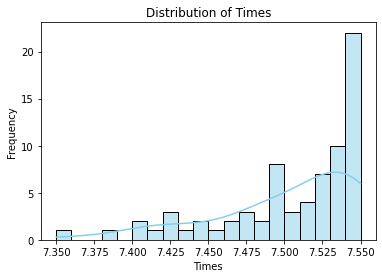

In [31]:
# Create a histogram using Seaborn
column_name = "Times"
sns.histplot(Mens60mHurdlesDF[column_name], bins=20, kde=True, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.title(f'Distribution of {column_name} for Mens 60m Hurdles')

# Show the plot
plt.show()

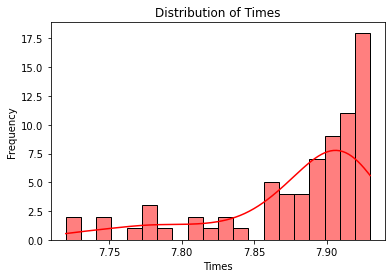

In [32]:
# Create a histogram using Seaborn
column_name = "Times"
sns.histplot(Womens60mHurdlesDF[column_name], bins=20, kde=True, color='red', edgecolor='black')

# Add labels and title
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.title(f'Distribution of {column_name} for Womens 60m Hurdles')

# Show the plot
plt.show()

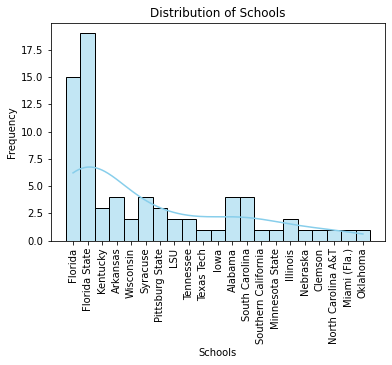

In [33]:
# Create a histogram using Seaborn
column_name = "Schools"
sns.histplot(Mens60mHurdlesDF[column_name], bins=20, kde=True, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.title(f'Distribution of {column_name} for Mens 60m hurdles')

#Make names more readable
plt.xticks(rotation=90)


# Show the plot
plt.show()

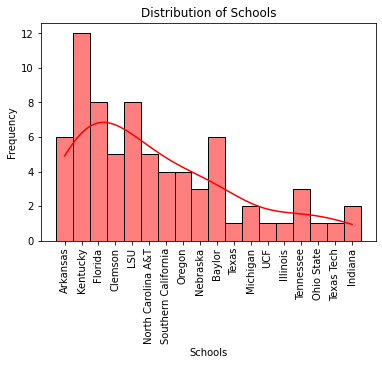

In [34]:
# Create a histogram using Seaborn
column_name = "Schools"
sns.histplot(Womens60mHurdlesDF[column_name], bins=20, kde=True, color='red', edgecolor='black')

# Add labels and title
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.title(f'Distribution of {column_name} for Womens 60m hurdles')

#Make names more readable
plt.xticks(rotation=90)

# Show the plot
plt.show()